# Text classification: Understanding the Customer's Feedback

---

Text classification is one of the important tasks of text mining

![alt text](http://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1535125878/NLTK3_zwbdgg.png)

In this notebook, we will perform Sentiment Analysis on IMDB movies reviews. Sentiment Analysis is the art of extracting people's opinion from digital text. We will use a regression model from Scikit-Learn able to predict the sentiment given a movie review.

We will use [the IMDB movie review dataset](http://ai.stanford.edu/~amaas/data/sentiment/), which consists of 50,000 movies review (50% are positive, 50% are negative).

The libraries needed in this exercise are:
* [Numpy](http://www.numpy.org/) — a package for scientific computing.
* [Pandas](https://pandas.pydata.org/) — a library providing high-performance, easy-to-use data structures and data analysis tools for the Python
* [Matplotlib](https://matplotlib.org/) — a package for plotting & visualizations.
* [scikit-learn](http://scikit-learn.org/stable/index.html) — a tool for data mining and data analysis.
* [NLTK](http://www.nltk.org/) — a platform to work with natural language.

##Loading the data

### Importing the libraries and necessary dictionaries

In [1]:
import numpy as np
import pandas as pd
import nltk
import matplotlib.pyplot as plt
from tensorflow import keras

# download Punkt Sentence Tokenizer
nltk.download('punkt')
# download stopwords
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### Loading the dataset in our directory

In [2]:
# download IMDB dataset
!wget "https://raw.githubusercontent.com/javaidnabi31/Word-Embeddding-Sentiment-Classification/master/movie_data.csv" -O "movie_data.csv"

# list files in current directory
!ls -lah

--2024-01-10 20:32:01--  https://raw.githubusercontent.com/javaidnabi31/Word-Embeddding-Sentiment-Classification/master/movie_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 65862309 (63M) [text/plain]
Saving to: ‘movie_data.csv’

movie_data.csv      100%[===================>]  62.81M   178MB/s    in 0.4s    

2024-01-10 20:32:02 (178 MB/s) - ‘movie_data.csv’ saved [65862309/65862309]

total 63M
drwxr-xr-x 1 root root 4.0K Jan 10 17:58 .
drwxr-xr-x 1 root root 4.0K Jan 10 17:38 ..
drwxr-xr-x 4 root root 4.0K Jan  9 14:22 .config
-rw-r--r-- 1 root root  63M Jan 10 20:32 movie_data.csv
drwxr-xr-x 1 root root 4.0K Jan  9 14:23 sample_data


###Reading the dataset file and getting info on it
**Question 1:** Use pandas to read the csv file and display the first 5 rows

In [54]:
# path to IMDB dataseet
path="movie_data.csv"

# read file (dataset) into our program using pandas
data=pd.read_csv("/content/movie_data.csv")

# display first 5 rows
data.head(5)

,review,sentiment
0,I went and saw this movie last night after bei...,1
1,Actor turned director Bill Paxton follows up h...,1
2,As a recreational golfer with some knowledge o...,1
3,"I saw this film in a sneak preview, and it is ...",1
4,Bill Paxton has taken the true story of the 19...,1


Getting info on our dataset

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 781.4+ KB


A balanced dataset in sentiment analysis is a dataset which holds an equal amount of positive sentiment data and negative sentiment data, meaning 50% of the data is positive and 50% is negative

**Question 2:** Check if dataset is balanced (number of positive sentiment = number of negative sentiment) by plotting the different classes

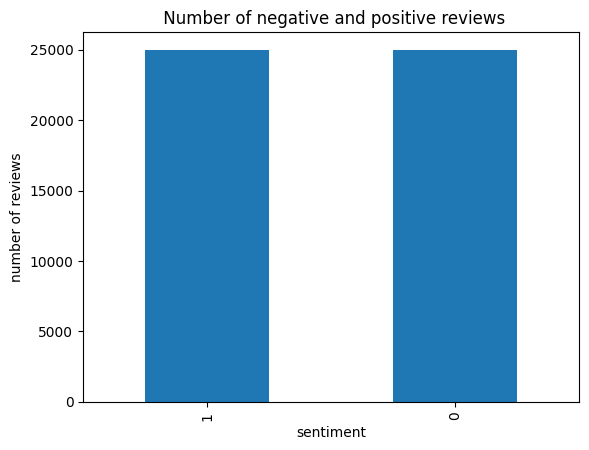

In [5]:
data['sentiment'].value_counts().plot(kind='bar')
plt.title(' Number of negative and positive reviews')
plt.xlabel('sentiment')
plt.ylabel('number of reviews')
plt.show()

## Text cleaning

In [6]:
print(data.review[7]) # show the seventh review

I felt this film did have many good qualities. The cinematography was certainly different exposing the stage aspect of the set and story. The original characters as actors was certainly an achievement and I felt most played quite convincingly, of course they are playing themselves, but definitely unique. The cultural aspects may leave many disappointed as a familiarity with the Chinese and Oriental culture will answer a lot of questions regarding parent/child relationships and the stigma that goes with any drug use. I found the Jia Hongsheng story interesting. On a down note, the story is in Beijing and some of the fashion and music reek of early 90s even though this was made in 2001, so it's really cheesy sometimes (the Beatles crap, etc). Whatever, not a top ten or twenty but if it's on the television, check it out.


**Question 3:** Let's define a function that would clean each movie review (sentence)

In [55]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer

english_stopwords = stopwords.words('english')
stemmer = PorterStemmer()

# define cleaning function
def clean_review(text):
    # remove punctuation
    text=re.sub(r'[^a-z]',' ',text)
    #tokenization
    tokens =word_tokenize(text)
  # remove stopwords
    word_tokens = [w for w in tokens if w not in english_stopwords]
  #stemming
    stem_words = [stemmer.stem(w) for w in word_tokens]

    return text

**Question 4 :** Try it out on an instance of the dataset then on the entire dataset.

In [58]:
print(data['review'][7])
print(clean_review(data.review[7]))





I felt this film did have many good qualities. The cinematography was certainly different exposing the stage aspect of the set and story. The original characters as actors was certainly an achievement and I felt most played quite convincingly, of course they are playing themselves, but definitely unique. The cultural aspects may leave many disappointed as a familiarity with the Chinese and Oriental culture will answer a lot of questions regarding parent/child relationships and the stigma that goes with any drug use. I found the Jia Hongsheng story interesting. On a down note, the story is in Beijing and some of the fashion and music reek of early 90s even though this was made in 2001, so it's really cheesy sometimes (the Beatles crap, etc). Whatever, not a top ten or twenty but if it's on the television, check it out.
  felt this film did have many good qualities   he cinematography was certainly different exposing the stage aspect of the set and story   he original characters as actor

And now clean the entire dataset reviews

In [45]:
# apply to all dataset
data['clean_review'] = data['review'].apply(clean_review)
data.sample(5)

,review,sentiment,clean_review
39550,After seeing this film I complained to my loca...,0,After seeing this film I complained to my loca...
19326,How do you make a totally unappealing movie ou...,0,How do you make a totally unappealing movie ou...
1618,I remember watching this film as a kid and I w...,1,I remember watching this film as a kid and I w...
32111,Even though Ian Kershaw distanced himself from...,1,Even though Ian Kershaw distanced himself from...
44209,The competition for the worst Warner Bros Kay ...,0,The competition for the worst Warner Bros Kay ...


## Split dataset for training and testing
We will split our data into two subsets: a 50% subset will be used for training the model for prediction and the remaining 50% will be used for evaluating or testing its performance. The random state ensures reproducibility of the results.

**Question 5:** Split your data to get x_train, x_test, y_train and y_test.

In [46]:
from sklearn.model_selection import train_test_split

X =data['clean_review']
y =data['sentiment']

# Split data into 50% training & 50% test
# Use a random state of 42 for example to ensure having the same split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(25000,) (25000,)
(25000,) (25000,)


## Feature extraction with Bag of Words


**Question 6:**  In this section, apply the Bag of Words method to learn the vocabulary of your text and with it transform your training input data.

In [47]:
from sklearn.feature_extraction.text import CountVectorizer

# define a CountVectorizer (with binary=True and max_features=10000)
count_vectorize=CountVectorizer(binary=True,max_features=10000)

# fit the vectorizer on x_train
vectorizer=count_vectorize.fit(X_train)

# learn the vocabulary of all tokens in our training dataset
count_vectorize.vocabulary_

# transform x_train to bag of words
x_train_bow = vectorizer.transform(X_train)
x_test_bow = vectorizer.transform(X_test)

print(x_train_bow.shape, y_train.shape)
print(x_test_bow.shape, y_test.shape)

(25000, 10000) (25000,)
(25000, 10000) (25000,)


In [48]:
print(x_train_bow)

  (0, 394)	1
  (0, 464)	1
  (0, 469)	1
  (0, 588)	1
  (0, 639)	1
  (0, 646)	1
  (0, 689)	1
  (0, 883)	1
  (0, 900)	1
  (0, 904)	1
  (0, 1134)	1
  (0, 1265)	1
  (0, 1312)	1
  (0, 1325)	1
  (0, 1400)	1
  (0, 1540)	1
  (0, 2355)	1
  (0, 2741)	1
  (0, 2909)	1
  (0, 2919)	1
  (0, 3191)	1
  (0, 3194)	1
  (0, 3210)	1
  (0, 3273)	1
  (0, 3391)	1
  :	:
  (24999, 6330)	1
  (24999, 6636)	1
  (24999, 6639)	1
  (24999, 7055)	1
  (24999, 7147)	1
  (24999, 7183)	1
  (24999, 7460)	1
  (24999, 7504)	1
  (24999, 7727)	1
  (24999, 8243)	1
  (24999, 8357)	1
  (24999, 8551)	1
  (24999, 8964)	1
  (24999, 8966)	1
  (24999, 9000)	1
  (24999, 9002)	1
  (24999, 9075)	1
  (24999, 9095)	1
  (24999, 9433)	1
  (24999, 9558)	1
  (24999, 9752)	1
  (24999, 9793)	1
  (24999, 9862)	1
  (24999, 9921)	1
  (24999, 9943)	1


## Classification

**Question 7:** Your data is ready for classification. For this task use [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

In [49]:

from sklearn.linear_model import LogisticRegression

# define the LogisticRegression classifier
logistic=LogisticRegression()


# train the classifier on the training data
logistic.fit(x_train_bow,y_train)

# get the mean accuracy on the training data
acc_train=logistic.score(x_train_bow,y_train)

print('Training Accuracy:', acc_train)

Training Accuracy: 0.98816


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**Question 8:**  Evaluating the performance of your model through its accuracy score

In [59]:
# Evaluate model with test data
print("test Accuracy=", logistic.score(x_test_bow,y_test))

test Accuracy= 0.86872


## Bonus: Let's use the model to predict!
To do so, let's create a predict function which takes as argument your model and the bag of words vectorizer together with a review on which it would predict the sentiment. This review should be cleaned with the `clean_review` function we built, transformed by bag of words and then used for prediction with `model.predict()`.

In [51]:
# define predict function
def predict(model, vectorizer, review):
  model=logistic
  review=clean_review(review)
  vectorizer=vectorizer
  review_bow = vectorizer.transform([review])
  model.predict(review_bow)

  return predict




And let's try it out on an example

In [52]:
review = 'The movie was great!'
print(logistic.predict(vectorizer.transform([review])))

[1]


In [53]:
review2 = 'i did not like this movie' # i try another negative review and it is work
print(logistic.predict(vectorizer.transform([review2])))

[0]
